## Epileplsy triggers detection

On December 16th, 1997, an episode of the wildly popular Pokémon anime had its premier broadcast in Japan. Roughly 20 minutes into the episode, titled "Dennō Senshi Porigon" (which roughly translates to "Cyber Soldier Porygon"), a sequence of flashing red and blue frames would cause huge problems for the show's many fans. In all, around 600-700 children required ambulances. While most recovered en route to the hospital, many more complained of headaches, eye strain, nausea and vomiting, and even, in rare cases, convulsions and even seizures. The event, later branded as "Pokémon Shock, would cause Nintendo's stock to drop 5%, the episode to be withdrawn from circulation, and legislation to be passed prohibiting such imagery from being broadcast in Japan, with similar legislation passing in the UK. While no similar legislation has been introduced in the United States, given the noteriety of the incident mentioned above, it seems highly unlikely that any companies would risk including such imagery.

However, in the age of user-generated content, those with photosensitivity or photosensitive epilepsy face an ever-growing pool of unregulated information. While tools do exist to help creators

<div class=“alert alert-success”>

<h2 style="color:#2596be;">Project's Description</h1> 

Our aim is to create a function that can identify potential hazards with flashing lights in a video file with an `\*.mp4` format. This function returns a list of seconds that contain potential hazard with flashing lights. 

To achieve this, we gathered videos that have been tagged with epilepsy warnings.  In addition to labeled videos we downloaded videos with explosions, lightning, and police car chases as "hidden hazard videos". We decided to include these videos in our project after reading an article about the impact of flashing lights on viewers in [this blog](https://veroniiiica.com/how-to-check-videos-for-flashing-lights/). Finally, we added a few videos to our collection featuring flashing lights (which can be hazardous) and fading lights (which are not hazardous) to enhance our collection.

Our team agreed that flashing lights would be deemed dangerous if they occur more than three times per second and less than fifty-five times per second based on information from the following sources:
- [Web accessibility for seizures and physical reactions](https://developer.mozilla.org/en-US/docs/Web/Accessibility/Seizure_disorders#flashing_blinking_flickering)
- [Section508.gov](https://www.section508.gov/content/guide-accessible-web-design-development/#flashing)

Our current project is able to detect flashes that occur across the entire screen. However, if the video has flashes that are limited to certain areas of the screen, our program may not be able to detect them.

In [3]:
# import data libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import modules
import video.df as df
import video.exploration as ex

In [4]:
# to be deleted later
from importlib import reload

<h3 style="color:#2596be;">Acquire and Prepare</h3> 

In order to get the same videos that we use in our project run the file `acquire.py`. It will download videos from YouTube and create genereted videos on you computer in the folder `'videos/'`. YouTube might ask you to confirm your account.

__Download__

We downloaded videos from YouTube using `pytube` package. If you would like to download the single video you can use the function `download_video` from the `acquire.py` file.

__Generate__
To get the generated videos use `generate_videos` function from `generator.py` file. 

<h3 style="color:#2596be;">Data Exploration</h3> 

In data exploration we will compare how to behave videos marked with epilepsy warning and the safe videos. We will plot the different chennels of videos to see if there is a difference between those videos. By default videos are represented with 3 channels: blue, green and red colors. We decided to use `hue`, `lightnees` and `saturation` channels in our project. Our first exploration will compare those channels in two videos:
1. Banned Pokemon Seizures Scene.mp4 (provokes seizures)
2. Little hens and dogs.mp4 (safe)

First, let's upload the videos into variables `hazard` and `safe` that repreent the videos above. We load videos into data frames where index represents the number of the frame and the columns contain agregated values with the average value of each channel

In [13]:
reload(df)

<module 'video.df' from '/Users/nadina/Documents/codeup/epilator/video/df.py'>

In [32]:
hazard = df.get_aggregated_df(df.get_exploration_df('videos/Banned Pokemon Seizure Scene.mp4'))
safe = df.get_aggregated_df(df.get_exploration_df('videos/little hens and dog.mp4'))

In [33]:
hazard.head(2)

,lightness,hue,saturation,masked_values,red_values,light_diff,hue_diff,saturation_diff,mask_diff
frame,,,,,,,,,
0,101.3840,93.9174,91.9946,1643,1342,NaN,NaN,NaN,NaN
1,101.3816,94.0271,92.0841,1643,1340,0.0024,-0.1097,-0.0895,0.0


In [34]:
safe.head(2)

,lightness,hue,saturation,masked_values,red_values,light_diff,hue_diff,saturation_diff,mask_diff
frame,,,,,,,,,
0,173.1386,21.0844,81.3253,7154,0,NaN,NaN,NaN,NaN
1,173.7277,20.9664,81.0861,7216,1,-0.5891,0.118,0.2392,-62.0


Q1. How different look hue channel in hazard and safe videos?

(0.0, 255.0)

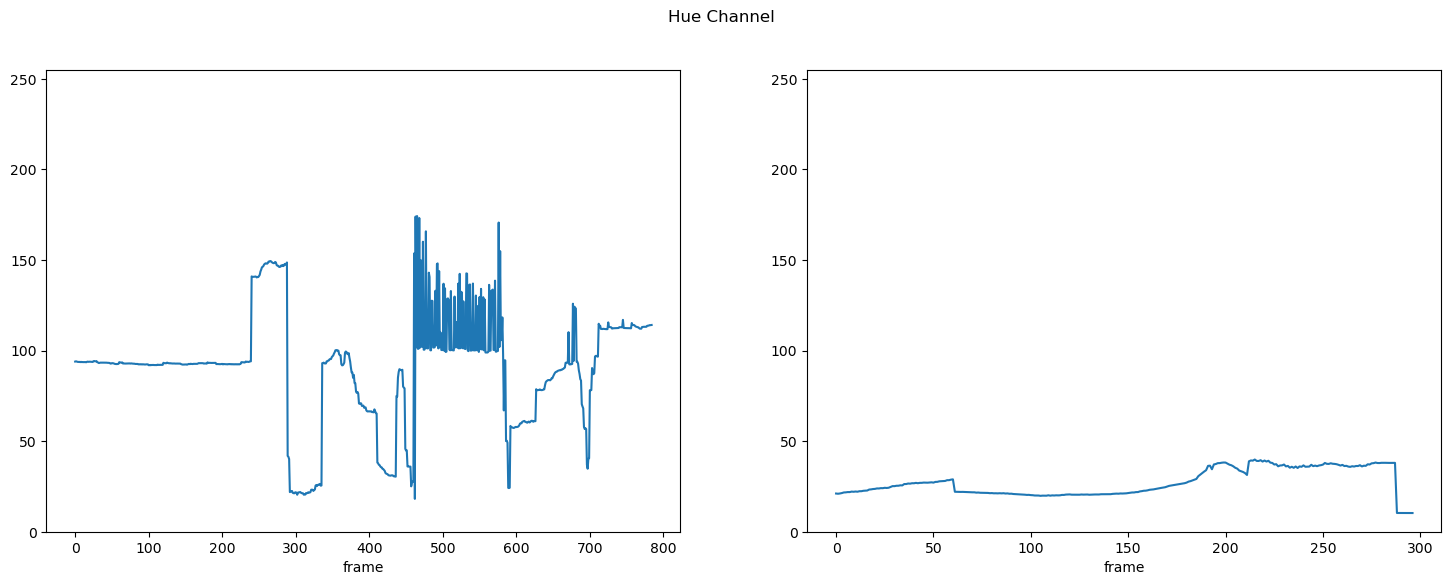

In [37]:
plt.figure(figsize=(18, 6))
plt.suptitle('Hue Channel')
plt.subplot(121)
hazard.hue.plot()
plt.ylim(0, 255)
plt.subplot(122)
safe.hue.plot()
plt.ylim(0, 255)

(0.0, 255.0)

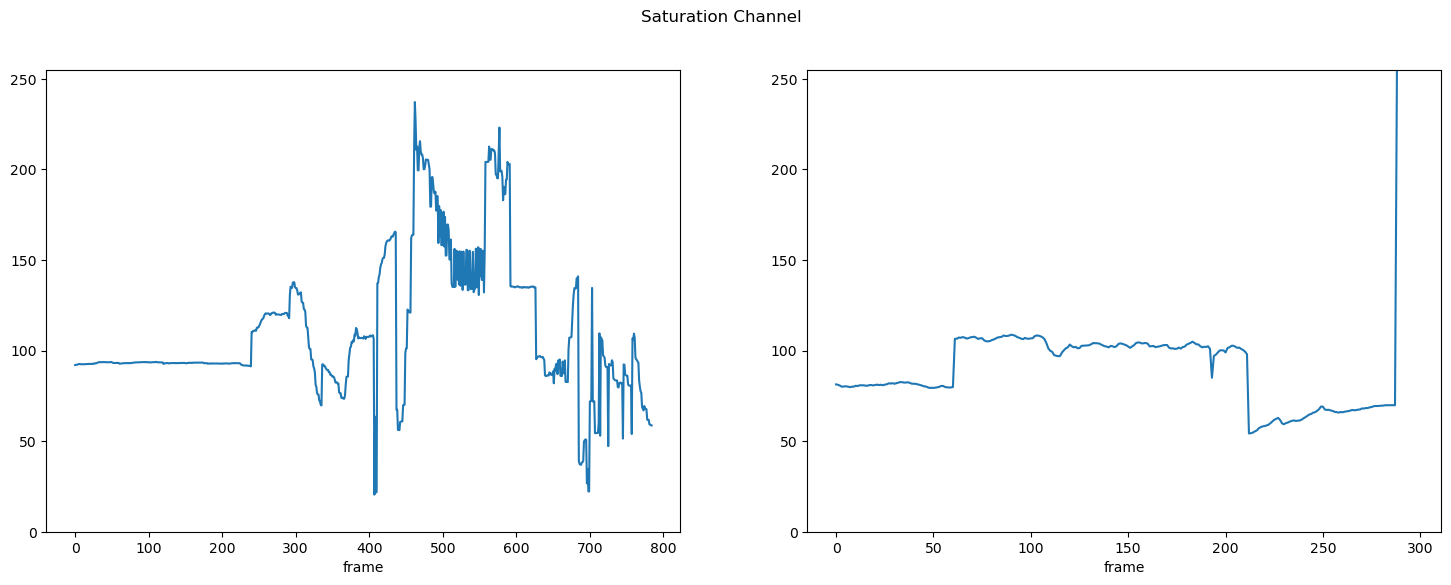

In [38]:
plt.figure(figsize=(18, 6))
plt.suptitle('Saturation Channel')
plt.subplot(121)
hazard.saturation.plot()
plt.ylim(0, 255)
plt.subplot(122)
safe.saturation.plot()
plt.ylim(0, 255)

(0.0, 255.0)

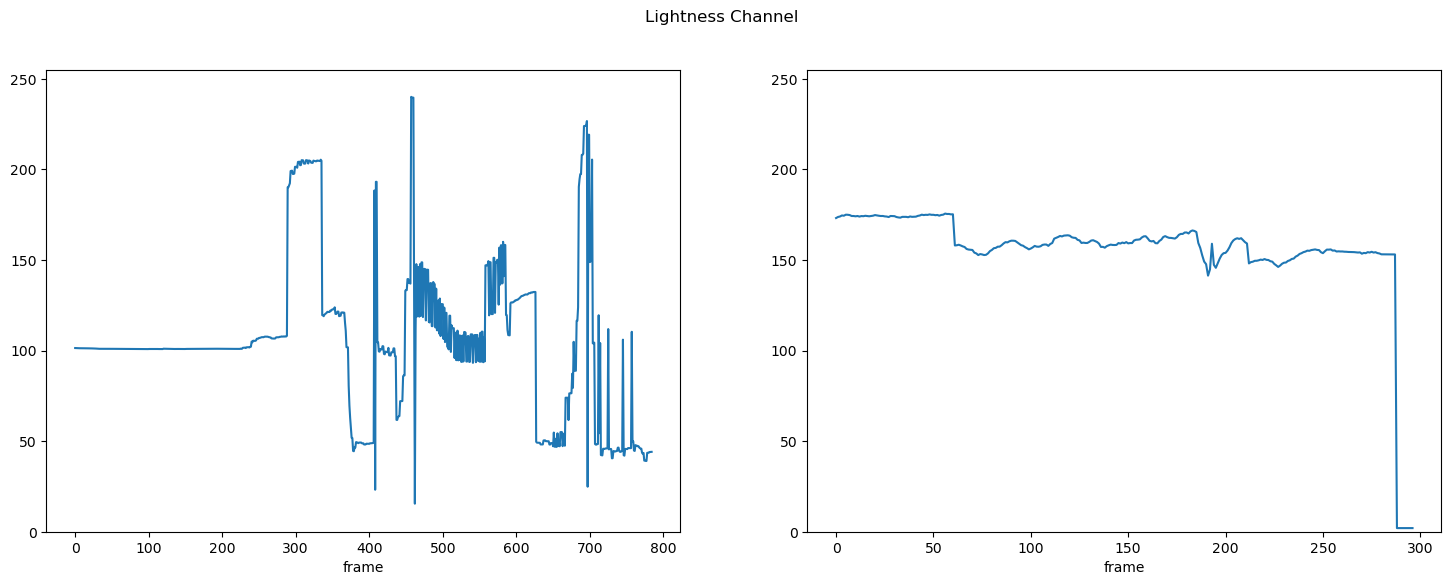

In [39]:
plt.figure(figsize=(18, 6))
plt.suptitle('Lightness Channel')
plt.subplot(121)
hazard.lightness.plot()
plt.ylim(0, 255)
plt.subplot(122)
safe.lightness.plot()
plt.ylim(0, 255)

<h3 style="color:#2596be;">Data Exploration Takeaways</h3> 

<h3 style="color:#2596be;">Triggers Detection</h3> 

<h3 style="color:#2596be;">Conclusions</h3> 